# Shell Element Responses (Pyvista)

In [2]:
import openseespy.opensees as ops
import opstool as opst
import opstool.vis.pyvista as opsvis

In [3]:
opst.load_ops_examples("Shell3D")

ops.timeSeries("Linear", 1)
ops.pattern("Plain", 1, 1)
opst.pre.gen_grav_load(direction="Z", factor=-9810)

The original Tcl file comes from http://www.dinochen.com/, and the Python version is converted by opstool.tcl2py().


OPSTOOL ::  Model data has been saved to _OPSTOOL_ODB/ModelData-None.nc!

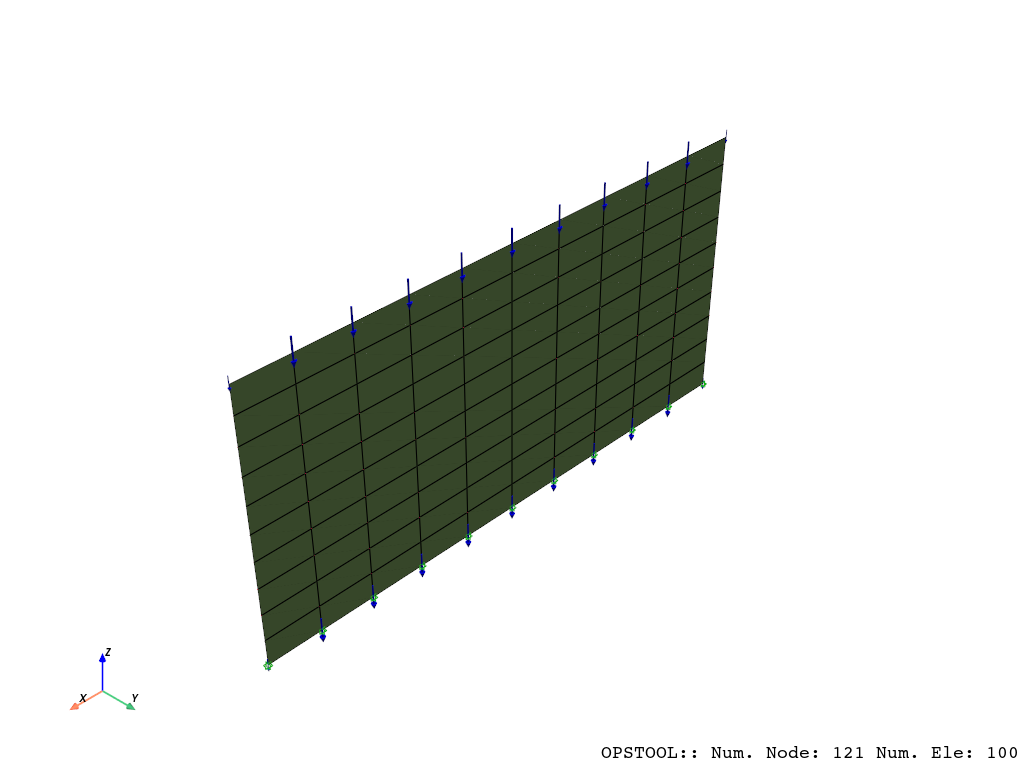

In [4]:
opsvis.set_plot_props(point_size=0, line_width=3, notebook=True)
fig = opsvis.plot_model(show_nodal_loads=True, show_ele_loads=True)
fig.show(jupyter_backend="jupyterlab")
# fig.show()

In [5]:
ops.constraints("Transformation")
ops.numberer("RCM")
ops.system("BandGeneral")
ops.test("NormDispIncr", 1.0e-8, 6, 2)
ops.algorithm("Linear")
ops.integrator("LoadControl", 0.1)
ops.analysis("Static")

In [6]:
ODB = opst.post.CreateODB(odb_tag=1)
for i in range(10):
    ops.analyze(1)
    ODB.fetch_response_step()
ODB.save_response()

OPSTOOL ::  All responses data with odb_tag = 1 saved in _OPSTOOL_ODB/RespStepData-1.nc!

OPSTOOL ::  Loading response data from _OPSTOOL_ODB/RespStepData-1.nc ...

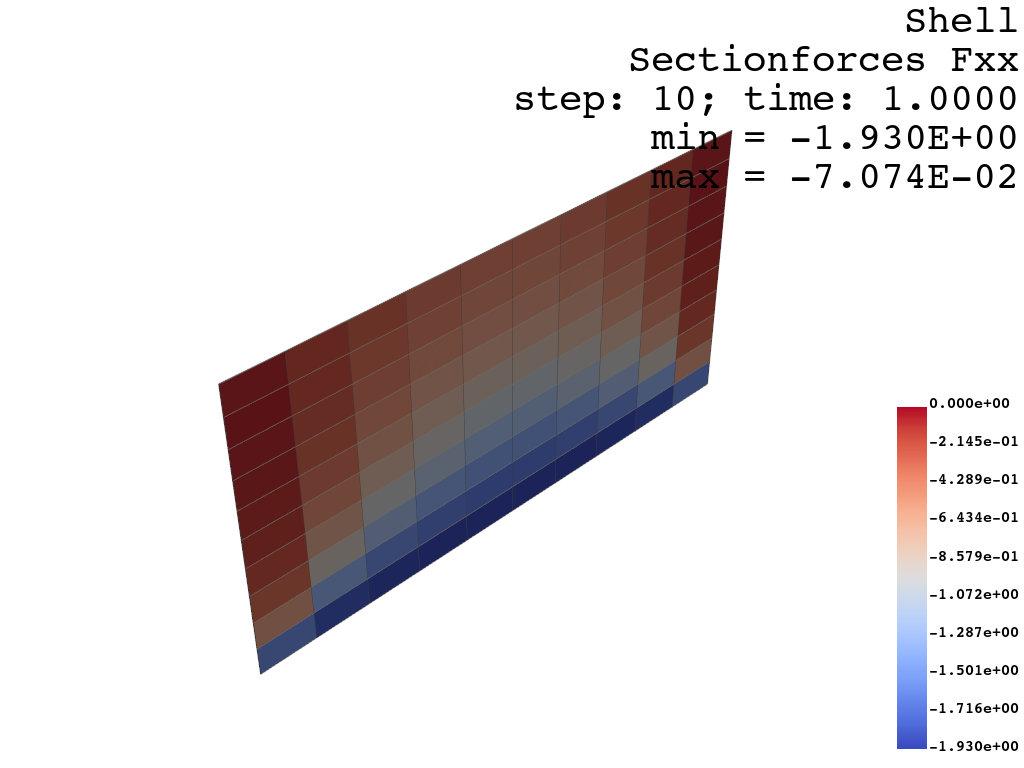

In [8]:
opsvis.set_plot_props(cmap="coolwarm", show_mesh_edges=False, notebook=True)

fig = opsvis.plot_unstruct_responses(
    odb_tag=1,
    slides=False,
    ele_type="Shell",
    resp_type="sectionForces",
    resp_dof="FXX",
)
fig.show(jupyter_backend="jupyterlab")
# fig.show()